# Instalacion de Librerias
Antes de proceder, necesitamos instalar las librerias necesarias. En nuestro caso, trabajaremos con la Libreria __[scikit-learn](https://scikit-learn.org/stable/index.html)__ en su version __0.24.2__. Esta libreria ofrece una amplia gama de algoritmos y/o tecnicas aplicadas no solo a la inteligencia artificial, sino tambien a otras areas como ciencia de datos. Para poder instalar nuestra libreria en la maquina virtual procederemos a ejecutar el siguiente comando: `!pip install -U scikit-learn==0.24.2`. La ejecucion puede tardar unos momentos.

In [ ]:
# Instalacion de libreria
!pip install -U scikit-learn==0.24.2

Ejecute la siguiente celda para comprobar que instalo la version correcta. Debe de poder visualizar el mensaje: `The scikit-learn version is 0.24.2.`

In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
# Nota: asegurese de que la version sea: 0.24.2

The scikit-learn version is 0.24.2.


Ejecute la siguiente celda para descargar funciones adicionales conjuntamente con los datos.

In [ ]:
!curl -OL https://raw.githubusercontent.com/aguilarls/practicas/main/Practica-Redes-Neuronales/files.tar.xz && tar -xf ./files.tar.xz

# Practica-2: Reconocimiento de Digitos

In [1]:
# Importar librerias
import matplotlib.pyplot as plt
import numpy as np
import joblib
from helper import plot_data
from helper import plot_neurons
from helper import plot_results
from helper import plot_errors
from helper import plot_loss
from sklearn.neural_network import MLPClassifier

# I. Introduccion
En esta aplicacion exploraremos una tarea de clasificacion. Para ello utilizaremos una __sub-seccion__ del dataset llamado [mnist](http://yann.lecun.com/exdb/mnist/). Este dataset esta compuesto por imagenes de digitos. En ciencias de la computacion se suelen representar las imagenes por pixiles, en concreto se habla de matrices. Por ejemplo el dataset contiene digitos en blanco y negro (escala de grises) de tamaño 24 x 24. En la siguiente imagen se observa parte del dataset.

<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" />
</div>

Nuestra tarea consistira en crear una red neuronal que sea capaz de reconocer los digitos. Para ello debemos primero de comprender la estructura de los datos.

Como primer paso, vamos a cargar el dataset.

In [2]:
# load
X_train = np.load('./sample/train.npy')
X_test = np.load('./sample/test.npy')
y_train = np.load('./sample/y_train.npy')
y_test = np.load('./sample/y_test.npy')
scaler = joblib.load('./sample/scaler.pkl')

Para esta ocacion, contamos con 2 grupos de datos:
* __X_train (entrenamiento)__: Usaremos estos datos para entrenar nuestra red neuronal.
* __X_test (test)__: Los datos de test los dejaremos para la __evaluacion final__ de nuestra red.

Sumados a los datos, estan presentes los targets de cada grupo con `y_train` y `y_test`. Finalmente estos datos __ya han sido pre-procesados__ con usando la variable `scaler`

Ahora comenzaremos a realizar algunas inspecciones. Primero usando el comando `shape` veremos cuantas filas y columnas tenemos.

In [3]:
X_train.shape

(18000, 784)

Como podemos observar, contamos con un total de __18000__ filas y __784__ columnas. Continuemos la exploracion con los datos de test (X_test).

In [4]:
X_test.shape

(3000, 784)

# II. Visualizacion

Como ya tenemos los datos divididos procederemos a realizar las visualizaciones. Como podemos notar las imagenes han sido expandidas, ya que contamos con 784 columnas, las cuales se pueden expresar como 28 * 28 = 784. Para ver los datos usaremos una funcion creada llamada `plot_data`

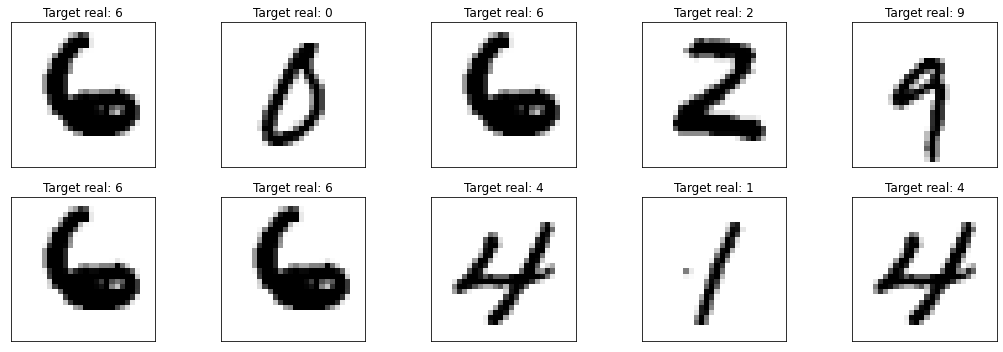

In [5]:
plot_data(X_train, y_train, scaler)

---

# III. Creacion de Red Neuronal

Para esta aplicacion, crearemos una red neuronal compuesta por __una capa oculta__ con __100 neuronas__. Como vimos previamente, usaremos la clase [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn-neural-network-mlpclassifier). Para poder definir la red neuronal necesitaremos proporcionar un grupo de parametros, para ello utilizaremos las siguientes variables:

* __capas_neuronas__: En este parametro especificaremos las capas ocultas. Para nuestro caso usaremos una tupla compuesta de la siguiente manera `(100, )`.
* __seed__: Utilizaremos esta variable para definir un numero entero que controle la aleatoriedad de la red. Usaremos el valor de `1`.
* __solver__: Utilizaremos esta variable para especificar el algortimo de optimizacion. Existen diversas opciones, para este caso usaremos `adam`.
* __ratio_aprendizaje__: Utilizaremos esta variable para definir el ratio de aprendizaje usado por el optimizador (solver). Definiremos este valor como `0.0001`.
* __iteraciones__: Definiremos en esta variable el numero de veces que nuestra red se entrenara. Usaremos el valor `200`.

La siguiente imagen muestra la arquitectura en detalle.

<div align="center">
<img src="https://raw.githubusercontent.com/aguilarls/practicas/main/Practica-Redes-Neuronales/images/red-01.png" />
</div>

In [6]:
capas_neuronas = (100, )
seed = 1
solver = 'adam'
ratio_aprendizaje = 0.0001
iteraciones = 200

In [7]:
red_neuronal = MLPClassifier(random_state = seed, max_iter = iteraciones, hidden_layer_sizes = capas_neuronas, learning_rate_init = ratio_aprendizaje, solver = solver)

---

# IV. Entrenamiento

En esta seccion procederemos a entrenar nuestra red neuronal. Para ello, una vez creada nuestra red con la clase `MLPClassifier`, podemos realizar el entrenamiento usando el comando `fit` de la siguiente manera:

```python
red_neuronal.fit(X_train, y_train)
```
Donde __X_train__ e __y_train__ representan los datos de entrenamiento y/o targets. Asimismo, añadiremos el comando extra `%time`. Este comando, nos permite medir el lapso de ejecucion en una celda. Generalmente se usa en conjunto con una funcion o comando. De acuerdo al tipo de hardware que se disponga, los resultados pueden variar. Podemos observar un caso practico de uso para estimar el lapso de etrenamiento de nuestra red. Para ello agregaremos `%time` antes de ejecutar el entrenamiento:
```python
%time red_neuronal.fit(X_train, y_train)
```
Dependiendo del hardware, obtendremos un resultado como el siguiente:
```
CPU times: user 23min 18s, sys: 8min 54s, total: 32min 12s
Wall time: 16min 28s
```
La interpretacion de estos los resultados se centra en el lapso requerido para ejecutar un proceso. En este caso, nos centraremos en la descripcion `Wall time` que hace referencia a cuanto ha pasado desde que se inicio el proceso de entrenamiento. En este caso se indica que son __16 min__ con __28 s__. Este valor cambiara cuando se modifique la arquitectura de la red. Por ejemplo si se agregan mas capas o neuronas el lapso incrementara. Lo contrario sucedera si se remueven capas o disminuye el numero de neuronas.

In [8]:
# entrenamiento
%time red_neuronal.fit(X_train, y_train)

CPU times: user 5min 20s, sys: 9min 17s, total: 14min 38s
Wall time: 1min 49s


MLPClassifier(learning_rate_init=0.0001, random_state=1)

Una vez entrenada nuestra red, procederemos a inspeccionar como se ha disminuido el error (loss) durante el entrenamiento. Para ello realizaremos una visualizacion.

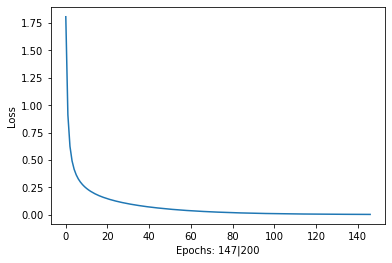

In [9]:
plot_loss(red_neuronal)

# V. Visualizacion de neuronas

En esta seccion procederemos a inspeccionar mas detalladamente nuestra red neuronal. Para ello vamos a explorar la configuracion de 10 neuronas.

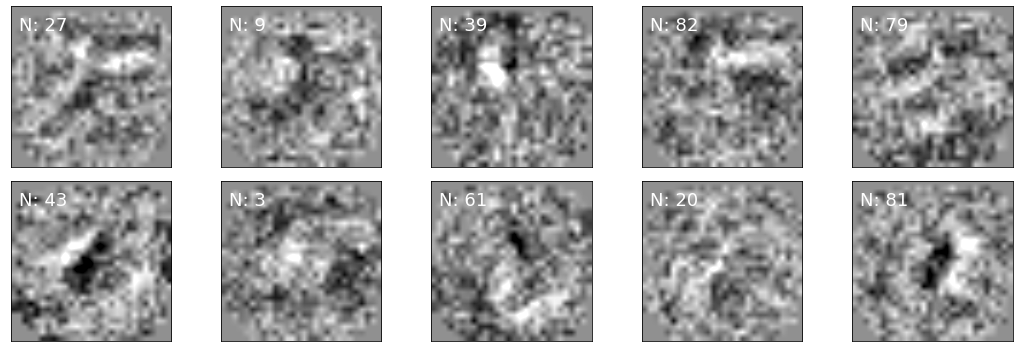

In [10]:
plot_neurons(red_neuronal)

El grafico de arriba muestra las neuronas de la capa oculta. La variable __N__ representa el numero de neurona. Como podemos observar se han formado ciertos patrones. Estos patrones permiten a la red realizar la clasificacion de los digitos. Asimismo, debemos notar que estos son frutos del entrenamiento que se ha realizado. Las imagenes se encuentran en escala de grises, en esta configuracion:

* Areas oscuras: Representan valores negativos grandes.
* Areas blancas: Representan valores positivos grandes.
* Areas grices: Representan valores cercanos a cero.

# VI. Predicciones

Una vez completada la fase de entrenamiento, vamos a realizar predicciones. Para ello, necesitaremos proporcionar datos al modelo, es decir: __X_train__, __X_test__ o datos nuevos. Para este ejemplo vamos a usar todos los conjuntos de datos. Asimismo, utilizaremos variables para almacenar las predicciones de la siguiente manera:

```python
# predicciones de entrenamiento
p_train = red_neuronal.predict(X_train)
# predicciones de test
p_test = red_neuronal.predict(X_test)
```

In [11]:
# predicciones de entrenamiento
p_train = red_neuronal.predict(X_train)
# predicciones de test
p_test = red_neuronal.predict(X_test)

Ahora procederemos a verificar nuestra predicciones con los datos reales. Primero comenzaremos con los datos de entrenamiento.

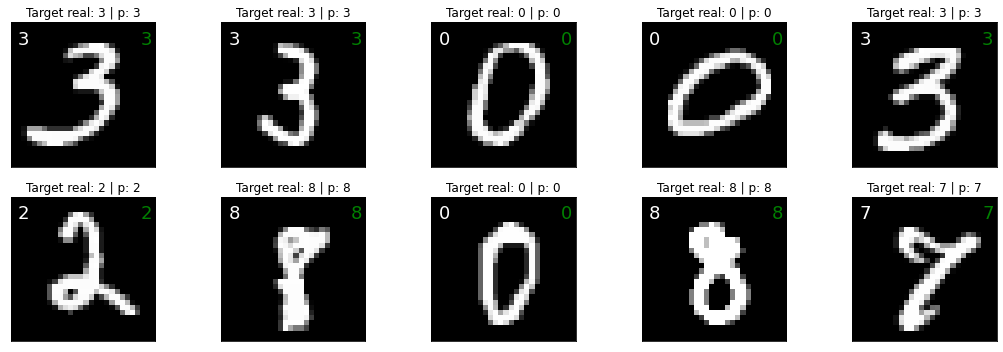

In [12]:
# visualizacion en datos de entrenamiento
plot_results(X_train, y_train, p_train, scaler)

En la imagen, en blanco se muestran los valores reales, mientras que la prediccion hecha por la red se muestra en verde.

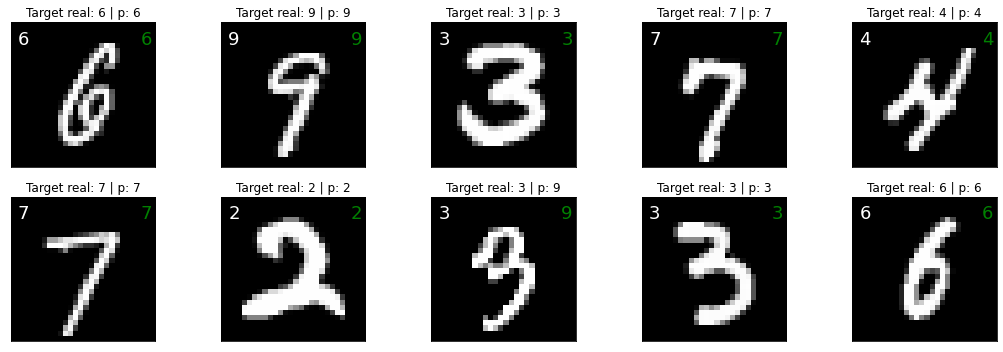

In [13]:
# # visualizacion en datos de test
plot_results(X_test, y_test, p_test, scaler)

---

# VII. Evaluacion

Una vez entrenado el modelo, procederemos a __evaluar__ la __presicion (accuracy)__ de las predicciones. Esto se realizara usando el comando `score(X, y)`, donde __X__ representa un conjunto de datos e __y__ los valores reales de ese conjunto. Con esta informacion, procederemos a evaluar el modelo con los datos de entrenamiento:

```python
red_neuronal.score(X_train, y_train)
```

Ahora para test:
```python
red_neuronal.score(X_test, y_test)
```

In [14]:
# Accuracy para entrenamiento
print(red_neuronal.score(X_train, y_train))

1.0


In [15]:
# Accuracy para test
print(red_neuronal.score(X_test, y_test))

0.952


---

# VII. Errores

En esta seccion visualizaremos que errores comete nuestra red. Una vez observados, discutiremos cada observacion en detalle.

In [16]:
# errores en entrenamiento
plot_errors(X_train, y_train, p_train, scaler)

No existen errores que mostrar


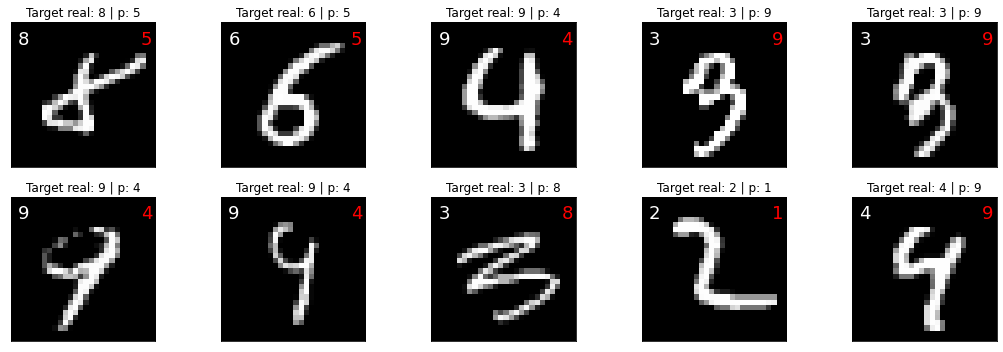

In [17]:
# errores en test
plot_errors(X_test, y_test, p_test, scaler)

---

# VIII. Video

En esta seccion vamos a crear un video con las visualizaciones de nuestra red. Para ello ejecutaremos el siguiente codigo.

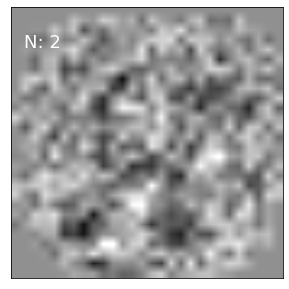

In [36]:
%matplotlib inline
import matplotlib
plt.rcParams["animation.html"] = "jshtml"
from matplotlib.animation import FuncAnimation

neurons = np.transpose(red_neuronal.coefs_[0])
sample = 100
vmin, vmax = red_neuronal.coefs_[0].min(), red_neuronal.coefs_[0].max()
dims = 28
try:
    s = np.random.choice(range(neurons.shape[0]), size = sample, replace = True).astype(int)
except:
    s = np.random.choice(range(neurons.shape[0]), size = sample, replace = False).astype(int)
    
fig, arr = plt.subplots(1, 1, figsize = (15, 5))
ann = arr.annotate('', xy = (0.05, 0.85), xycoords = "axes fraction", color = "white", fontsize = 18)
arr.xaxis.set_visible(False)
arr.yaxis.set_visible(False)
def animate(idx):
    ann.set_text('N: {}'.format(s[idx]))
    arr_plot = arr.imshow(neurons[s[idx], :].reshape(dims, dims), cmap = plt.get_cmap('gray'), interpolation = 'bilinear', vmin=.5 * vmin, vmax=.5 * vmax)
    return arr_plot

ani = FuncAnimation(fig, animate, frames = s.shape[0], interval = 1000, save_count = 50)
Writer = matplotlib.animation.writers['ffmpeg']
writer = Writer(fps = 3, metadata=dict(artist='Me'))
ani.save('video.mp4', writer=writer)
ani

Ahora procederemos a bajar nuestro video. Para ello vamos a desca|rgar el video usando el siguiente comando.

In [ ]:
from google.colab import files
files.download('video.mp4')

# IX. Concluciones:
* En este Notebook ha aprendido cual es el proceso durante el entrenamiento de una red Neuronal.
* Si bien es cierto uso la libreria __scikit-learn__, esta no es la unica alternativa disponible. De hecho existen diversas herramientas (librerias) con las que se puede trabajar. No obstante le recordamos siempre considerar aquellas de __codigo abierto__ (cuando la situacion lo requiera), ya que muchos modelos complejos se entrenan usando __software libre__.
* Entrenar redes es una tarea ardua que involucra muchos factores, como la arquitectura de la red. De hecho diferentes arquitecturas resultan en performances variadas.
* Es importante recordar que los datos de entrenamiento se usan para la red. Los datos de test se usan para evaluar. Es importante que no mezcle los datos, ya que obtendra resultados __sobre estimados__.
* Existen diversas formas de division de datos. En este ejemplo hemos usado un 90-10%, donde 90% para entrenamiento y 10% para test. No obstante alternativas como la validacion cruzada y otras tambien se pueden aplicar.

---